# Лабораторная работа №2 

# Васильев А.Р. ИУ5-24М

# Часть 1

### Цель лабораторной работы: изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

### Требования к отчету:

1) Отчет по лабораторной работе должен содержать:

* титульный лист;
* описание задания;
* текст программы;
* экранные формы с примерами выполнения программы.

2) Задание:
* Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
* Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  - устранение пропусков в данных;
  - кодирование категориальных признаков;
  - нормализацию числовых признаков.

In [ ]:
!pip install category_encoders
!pip install catboost

     |████████████████████████████████| 67.3MB 65kB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('aug_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## Кодирование категориального признака

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


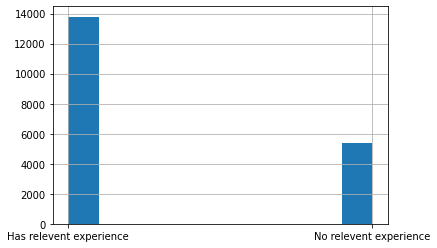

In [ ]:
from category_encoders import TargetEncoder

df.relevent_experience.hist()
relevant_expiriense_te = TargetEncoder()
df.relevent_experience = relevant_expiriense_te.fit_transform(df.relevent_experience, df.target)

In [ ]:
df.relevent_experience

0        0.214690
1        0.338427
2        0.338427
3        0.338427
4        0.214690
           ...   
19153    0.338427
19154    0.214690
19155    0.214690
19156    0.214690
19157    0.338427
Name: relevent_experience, Length: 19158, dtype: float64

## Устранение пропусков в признаке Пол

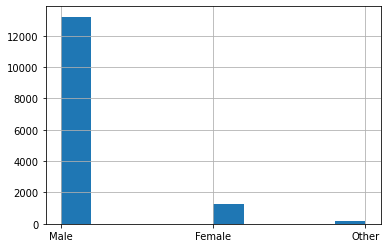

In [ ]:
df.gender.hist()

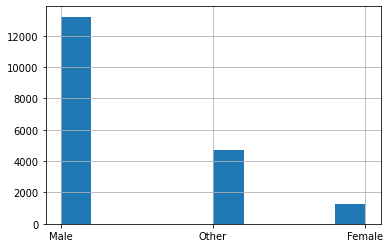

In [ ]:
df.gender = df.gender.fillna('Other')
df.gender.hist()

## Нормализация числового признака

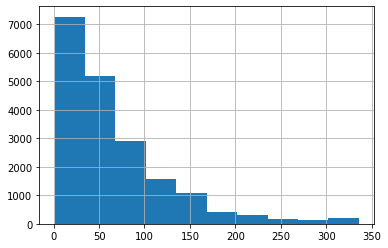

In [ ]:
df.training_hours.hist()

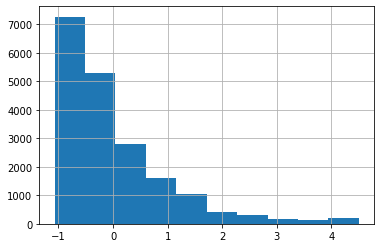

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['training_hours_std_scale'] = scaler.fit_transform(np.array(df.training_hours).reshape(df.training_hours.shape[0], 1))
df.training_hours_std_scale.hist()

# Часть 2

### Цель лабораторной работы: изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

### Требования к отчету:

1) Отчет по лабораторной работе должен содержать:

* титульный лист;
* описание задания;
* текст программы;
* экранные формы с примерами выполнения программы.

2) Задание:
* Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
* Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  - масштабирование признаков (не менее чем тремя способами);
  - обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
  - обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
  - отбор признаков:
    + один метод из группы методов фильтрации (filter methods);
    + один метод из группы методов обертывания (wrapper methods);
    + один метод из группы методов вложений (embedded methods).

### Масштабируем признак несколькими способами

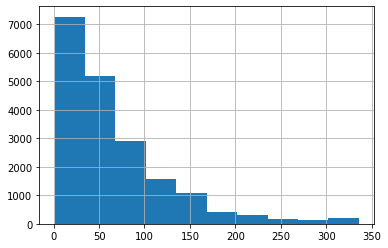

In [ ]:
df.training_hours.hist()

#### MinMaxScaling с работой с выбросами

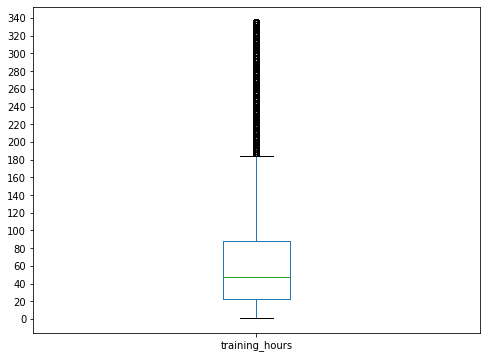

In [ ]:
plt.figure(figsize=(8,6))
df.training_hours.plot(kind='box')
plt.yticks(list(range(0,350, 20)))
plt.show()

In [ ]:
# отбрасываем выбросы
tmp_df = df[df.training_hours < 200]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


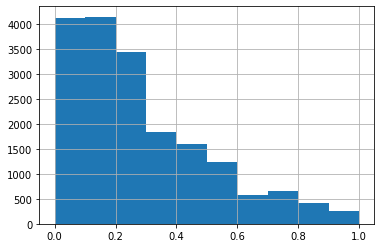

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
tmp_df.training_hours = min_max.fit_transform(np.array(tmp_df.training_hours).reshape(tmp_df.training_hours.shape[0], 1))
tmp_df.training_hours.hist()

#### MaxAbsScaler

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


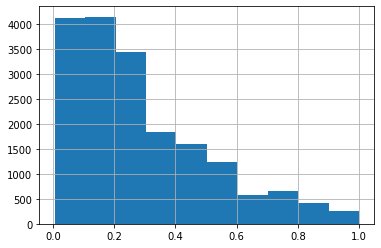

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

tmp_df = df[df.training_hours < 200]
min_abs = MaxAbsScaler()
tmp_df.training_hours = min_abs.fit_transform(np.array(tmp_df.training_hours).reshape(tmp_df.training_hours.shape[0], 1))
tmp_df.training_hours.hist()

#### RobustScaler

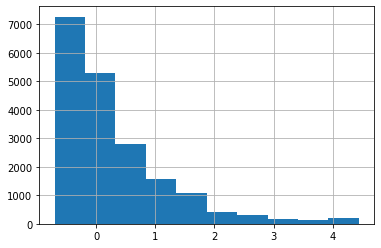

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
tmp_df = df.copy()
tmp_df['training_hours_std_scale'] = robust_scaler.fit_transform(np.array(tmp_df.training_hours).reshape(tmp_df.training_hours.shape[0], 1))
tmp_df.training_hours_std_scale.hist()

### Обработка выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);

In [ ]:
df.experience.unique()  # сделаем числовой признак из фичи experience

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [ ]:
df.experience = df.experience.apply(lambda x: str(x).strip('<>') if str(x) != 'nan' else np.NaN)

In [ ]:
df.experience.isna().sum() # 65 пропущенных значений

65

#### удалим строки с experience - nan

In [ ]:
shape_before = df.shape[0]
res_df = df.dropna(subset=['experience'], inplace=False)
print(shape_before, res_df.shape[0], ', dropped', shape_before - res_df.shape[0], 'rows')

19158 19093 , dropped 65 rows


#### Заполним пропуски в том же признаке с помощью моды

In [ ]:
print('experience mode:', df.experience.mode)
new_experience = df.experience.fillna(df.experience.mode)
print('nan values count:', new_experience.isna().sum())

experience mode: <bound method Series.mode of 0        20
1        15
2         5
3         1
4        20
         ..
19153    14
19154    14
19155    20
19156     1
19157     2
Name: experience, Length: 19158, dtype: object>
nan values count: 0


### Создадим еще признак из признака company_size этот признак будет не числовым и не категориальным

In [ ]:
df.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [ ]:
def mean_mapper(value):
  if isinstance(value, float):  # если значение пропущено вернем его же
    return np.nan
  if '-' in value:
    low, high = [int(i) for i in value.strip().split('-')]
    return (high-low)/2
  if '/' in value:
    low, high = [int(i) for i in value.strip().split('/')]
    return (high-low)/2
  if '<' in value or '>' in value:
    return int(str(value).strip('<>'))

In [ ]:
df.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [ ]:
df['company_size_numeric'] = df.company_size.apply(mean_mapper)
df.company_size_numeric = df.company_size_numeric.fillna(df.company_size_numeric.mean())  # заполним медианой

In [ ]:
df.company_size_numeric.unique()

array([ 438.60940987,   24.5       ,   10.        , 2499.5       ,
       1999.5       ,   19.5       ,  200.        ,  249.5       ])

### Отбор признаков

#### Закодируем все признаки в численные

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   enrollee_id               19158 non-null  int64  
 1   city                      19158 non-null  object 
 2   city_development_index    19158 non-null  float64
 3   gender                    19158 non-null  object 
 4   relevent_experience       19158 non-null  float64
 5   enrolled_university       18772 non-null  object 
 6   education_level           18698 non-null  object 
 7   major_discipline          16345 non-null  object 
 8   experience                19093 non-null  object 
 9   company_size              13220 non-null  object 
 10  company_type              13018 non-null  object 
 11  last_new_job              18735 non-null  object 
 12  training_hours            19158 non-null  int64  
 13  target                    19158 non-null  float64
 14  traini

In [ ]:
df.gender.dtype

dtype('O')

In [ ]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in df.columns:
  if df[col].dtype == 'O' and len(df[col].unique()) >= 4:
      tmp_enc = TargetEncoder()
      encoders[str(col)+'_te'] = tmp_enc
      df[col] = tmp_enc.fit_transform(df[col], df.target)
  elif len(df[col].unique()) < 4 and df[col].dtype == 'O':
      tmp_enc = LabelEncoder()
      encoders[str(col)+'_le'] = tmp_enc
      df[col] = tmp_enc.fit_transform(df[col])

X = df[[i for i in df.columns if i !='target']]
y = df.target

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: Future

#### Метод фильтрации связанный с статистическими характеристиками

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

res = SelectKBest().fit(X, y)

selected_features = [name for name, mask in zip(X.columns, res.get_support()) if mask == True]
print(selected_features)

['city', 'city_development_index', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


#### Метод обертывания

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

efs1 = EFS(knn, 
           min_features=2,
           max_features=3,
           scoring='roc_auc',
           print_progress=True,
           cv=5, n_jobs=-1)

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 560/560

Best accuracy score: 0.75
Best subset (indices): (2, 7, 9)
Best subset (corresponding names): ('city_development_index', 'major_discipline', 'company_size')


#### Метод вложений

In [ ]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика!
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

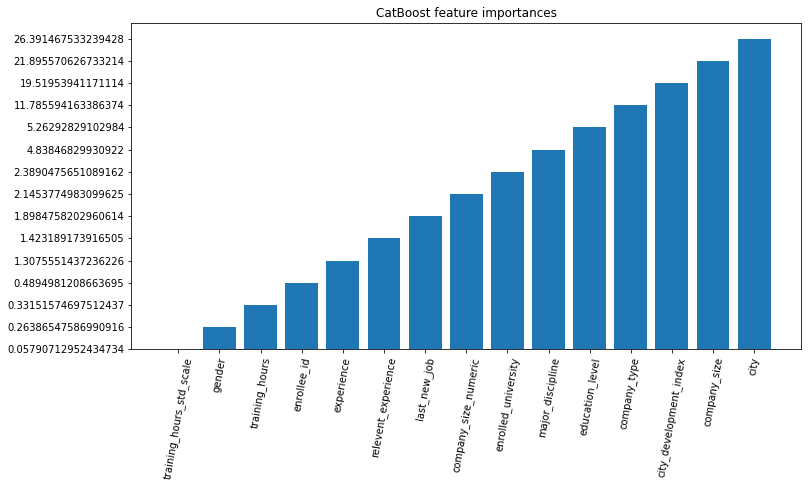

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)

cat_clf = CatBoostClassifier(random_state=42, iterations=2000, early_stopping_rounds=30, eval_metric='AUC', verbose=False)
cat_clf.fit(X_train, y_train, eval_set=(X_val, y_val))

res = np.array(sorted([(n,float(f)) for n,f in zip(X_train.columns, cat_clf.feature_importances_)], key=lambda x: x[1], reverse=False))


plt.figure(figsize=(12, 6))
plt.bar(res[:,0], res[:,1])
plt.title('CatBoost feature importances')
plt.xticks(res[:,0], rotation=80)
plt.show()